In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import seaborn as sns
from codecs import encode
from matplotlib.colors import ListedColormap

In [41]:
#path to file (and optional color table)
file = "C:\\Users\\strang\\Downloads\\CERES_NETFLUX_M_2022-05-01_rgb_360x180.csv"
color =  "C:\\Users\\strang\\Downloads\\ceres_net.act"

In [28]:
#open to a Pandas DataFrame
df = pd.read_csv(file, index_col=False, header=None)

In [29]:
#indexes for DataFrame
new_lon = np.concatenate([np.arange(180,360,1),np.arange(0,180,1)])
new_lat = np.arange(90, -90, -1)
df.index = new_lat
df.columns = new_lon

In [30]:
#change fill value to NaN
df = df.where(df != 99999.0, np.nan)

In [31]:
#sort coordinates
df = df.sort_index(axis=1, level=None, ascending=True, inplace=False, kind='quicksort')

In [32]:
#read color table to a list
#source: https://stackoverflow.com/questions/48873754/how-to-read-photoshop-act-files-with-python


def act_to_list(act_file):
    with open(act_file, 'rb') as act:
        raw_data = act.read()                           # Read binary data
    hex_data = encode(raw_data, 'hex')                  # Convert it to hexadecimal values
    total_colors_count = (int(hex_data[-7:-4], 16))     # Get last 3 digits to get number of colors total
    misterious_count = (int(hex_data[-4:-3], 16))       # I have no idea what does it do
    colors_count = (int(hex_data[-3:], 16))             # Get last 3 digits to get number of nontransparent colors

    # Decode colors from hex to string and split it by 6 (because colors are #1c1c1c)               
    colors = [hex_data[i:i+6].decode() for i in range(0, total_colors_count*6, 6)]

    # Add # to each item and filter empty items if there is a corrupted total_colors_count bit        
    colors = ['#'+i for i in colors if len(i)]

    return colors, total_colors_count

In [33]:
palette, _ = act_to_list(color)

Text(0.5, 1.0, 'NET RADIATION (MAY 2022)')

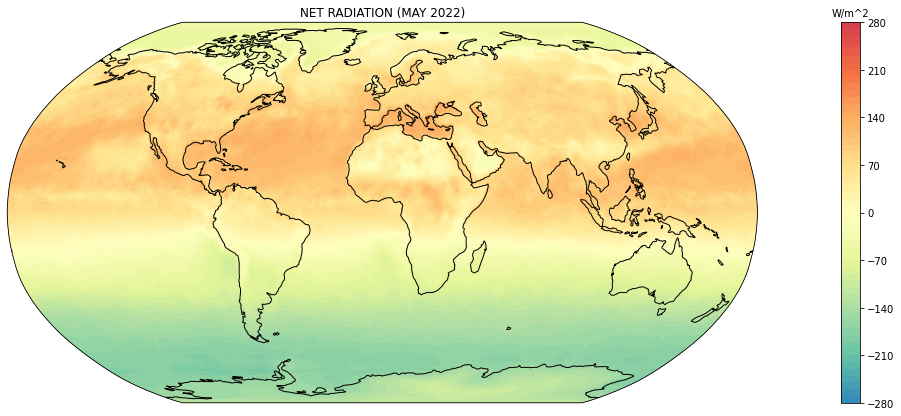

In [51]:
#figure
fig = plt.figure(figsize=(30,7))
#axis, projection
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
#DataFrame -> array
data=np.asarray(df)
#create a color palette from color list
pal = sns.color_palette(palette=palette, n_colors=256)
#colormap from color palette
cmap = ListedColormap(pal)
#connect sides together
data, lons = add_cyclic_point(data, coord=df.columns)
#range for colors, adjust according to data used
clevs = np.arange(-280,290,10)
#plot the map (if optional colormap was skipped, "cmap" can be removed or another colormap may be used. E.g. cmap="coolwarm")
cs = ax.contourf(lons, df.index, data, clevs, cmap=cmap, transform=ccrs.PlateCarree())
#colorbar, adjust ticks according to data used or use automatic ticks
cb = fig.colorbar(cs, ax=ax, ticks=[-280, -210, -140, -70, 0, 70, 140, 210, 280])
cb.ax.set_title('W/m^2',fontsize=10)
#add coastlines
ax.coastlines()
#backgroud color
ax.patch.set_facecolor(color='black')
#title
ax.set_title("NET RADIATION (MAY 2022)")